### SENTIMEN ANALISIS TERHADAP ULASAN MASKER KESEHATAN PADA APLIKASI TOKOPEDIA MENGGUNAKAN METODE NAIVE BAYES CLASSIFIER

Klasifikasi menggunakan Algoritma Naïve Bayes adalah salah satu metode yang umum digunakan dalam analisis sentimen. Algoritma Naïve Bayes merupakan metode pembelajaran mesin yang berdasarkan teorema Bayes dengan asumsi independensi antara fitur-fitur yang ada dalam data. Meskipun asumsi independensi ini sering kali tidak terpenuhi dalam konteks data nyata, Algoritma Naïve Bayes tetap memberikan hasil yang baik dan mudah diimplementasikan.

Proses klasifikasi dengan Algoritma Naïve Bayes melibatkan dua tahap utama: tahap pelatihan dan tahap pengujian. Pada tahap pelatihan, model Naïve Bayes dilatih menggunakan dataset ulasan yang telah diberi label sentimen (misalnya, positif, negatif, atau netral). Selama pelatihan, model akan mempelajari distribusi probabilitas dari setiap kata atau fitur dalam setiap kategori sentimen.

Setelah tahap pelatihan selesai, model Naïve Bayes dapat digunakan untuk mengklasifikasikan ulasan yang belum diketahui sentimennya pada tahap pengujian. Proses ini melibatkan perhitungan probabilitas posterior untuk setiap kategori sentimen berdasarkan kata-kata atau fitur-fitur yang ada dalam ulasan tersebut. Kemudian, model akan mengatribusikan ulasan tersebut ke kategori sentimen dengan probabilitas posterior tertinggi.

### Pendahuluan
Dalam era digital yang semakin berkembang, semakin banyak pengguna yang berbagi ulasan dan pendapat mereka tentang berbagai produk di platform e-commerce seperti Tokopedia. Ulasan pengguna ini sangat berharga dalam memahami persepsi dan sentimen pelanggan terhadap suatu produk. Oleh karena itu, analisis sentimen ulasan produk menjadi penting dalam mengidentifikasi pandangan positif, negatif, atau netral yang terkandung dalam ulasan tersebut.

Salah satu produk yang sering mendapatkan ulasan adalah masker. Masker telah menjadi kebutuhan yang sangat penting pada saat pandemi COVID-19. Oleh karena itu, analisis sentimen ulasan produk masker dapat memberikan wawasan yang berharga bagi produsen, penjual, dan pengguna dalam memahami kualitas, kinerja, dan kepuasan pelanggan terhadap berbagai jenis masker yang tersedia di platform e-commerce.

Dalam penelitian ini, Saya akan melakukan klasifikasi analisis sentimen ulasan untuk produk masker yang tersedia di Aplikasi Tokopedia. Metode yang akan Saya gunakan adalah Algoritma Naïve Bayes, yang merupakan salah satu metode klasifikasi yang populer dalam pemrosesan bahasa alami. Metode ini didasarkan pada teorema Bayes dan mengasumsikan independensi antara fitur-fitur yang ada dalam data.

Tujuan dari penelitian ini adalah untuk mengklasifikasikan ulasan-ulasan tersebut menjadi tiga kategori sentimen utama: positif dan negatif. Dengan demikian, hasil dari analisis ini dapat memberikan pemahaman yang lebih baik tentang preferensi dan kebutuhan pengguna terkait masker, serta memberikan informasi berharga kepada produsen dan penjual dalam meningkatkan kualitas produk mereka.

Dalam penelitian ini, Saya akan menggunakan dataset ulasan produk masker yang telah dikumpulkan dari Tokopedia. Setelah melakukan pra-pemrosesan data, kami akan melatih model Naïve Bayes menggunakan data pelatihan dan menguji performanya dengan data uji. Selanjutnya, Saya akan melakukan evaluasi kinerja model dan menganalisis hasil yang diperoleh.

Diharapkan bahwa hasil dari penelitian ini dapat memberikan kontribusi dalam pemahaman sentimen pengguna terkait produk masker di platform e-commerce dan memberikan wawasan yang berguna bagi produsen dan penjual dalam meningkatkan kualitas produk mereka.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

data = pd.read_excel("tokped_text.xlsx", index_col=0)

data.head()

,Nama_Produk,Akun,Ulasan,rate,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed\t,Ulasan_Stemmed,Ulasan_clean
1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Stephanus,dua kali beli sayang lambat respon order pagi ...,3,"['yang', 'dua', 'kali', 'beli', 'sayang', 'lam...","['yang', 'dua', 'kali', 'beli', 'sayang', 'lam...","['dua', 'kali', 'beli', 'sayang', 'lambat', 'r...","['dua', 'kali', 'beli', 'sayang', 'lambat', 'r...",dua kali beli sayang lambat respon order pagi ...
2,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Yati,bagus kirim cepat,5,"['bagus', 'kirim', 'cepat']","['bagus', 'kirim', 'cepat']","['bagus', 'kirim', 'cepat']","['bagus', 'kirim', 'cepat']",bagus kirim cepat
3,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Husin,barang sesuai pesan,5,"['barang', 'sesuai', 'pesan']","['barang', 'sesuai', 'pesan']","['barang', 'sesuai', 'pesan']","['barang', 'sesuai', 'pesan']",barang sesuai pesan
4,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Febby,panas pakai,2,"['panas', 'pakai']","['panas', 'pakai']","['panas', 'pakai']","['panas', 'pakai']",panas pakai
5,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Rahmat,barang sesuai minta bagus komunikasi jual beli...,3,"['barang', 'sesuai', 'minta', 'bagus', 'komuni...","['barang', 'sesuai', 'minta', 'bagus', 'komuni...","['barang', 'sesuai', 'minta', 'bagus', 'komuni...","['barang', 'sesuai', 'minta', 'bagus', 'komuni...",NaN


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 1 to 503
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Nama_Produk           503 non-null    object
 1   Akun                  503 non-null    object
 2   Ulasan                503 non-null    object
 3   rate                  503 non-null    int64 
 4   Ulasan_tokenize       503 non-null    object
 5   Ulasan_normalized     503 non-null    object
 6   Ulasan_stop_removed	  501 non-null    object
 7   Ulasan_Stemmed        501 non-null    object
 8   Ulasan_clean          500 non-null    object
dtypes: int64(1), object(8)
memory usage: 39.3+ KB


In [6]:
data.describe()

,rate
count,503.000000
mean,4.427435
std,1.154500
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


## Preprocessing

### Labelling
Pembagian data menjadi data sentimen berlabel positif dan negatif dengan angka 1 untuk positif dan angka 0 untuk negatif. Pengklasifikasian ini dilakukan pada ulasan yang memiliki rating 4 dan 5 sebagai sentimen positif dan rating 3 sampai 1 sebagai sentimen negatif.

In [7]:
label = []
for index, row in data.iterrows():
    if row["rate"] == 5 or row["rate"] == 4:
        label.append(1)
    else:
        label.append(0)

data["label"] = label

data

,Nama_Produk,Akun,Ulasan,rate,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed\t,Ulasan_Stemmed,Ulasan_clean,label
1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Stephanus,dua kali beli sayang lambat respon order pagi ...,3,"['yang', 'dua', 'kali', 'beli', 'sayang', 'lam...","['yang', 'dua', 'kali', 'beli', 'sayang', 'lam...","['dua', 'kali', 'beli', 'sayang', 'lambat', 'r...","['dua', 'kali', 'beli', 'sayang', 'lambat', 'r...",dua kali beli sayang lambat respon order pagi ...,0
2,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Yati,bagus kirim cepat,5,"['bagus', 'kirim', 'cepat']","['bagus', 'kirim', 'cepat']","['bagus', 'kirim', 'cepat']","['bagus', 'kirim', 'cepat']",bagus kirim cepat,1
3,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Husin,barang sesuai pesan,5,"['barang', 'sesuai', 'pesan']","['barang', 'sesuai', 'pesan']","['barang', 'sesuai', 'pesan']","['barang', 'sesuai', 'pesan']",barang sesuai pesan,1
4,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Febby,panas pakai,2,"['panas', 'pakai']","['panas', 'pakai']","['panas', 'pakai']","['panas', 'pakai']",panas pakai,0
5,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Rahmat,barang sesuai minta bagus komunikasi jual beli...,3,"['barang', 'sesuai', 'minta', 'bagus', 'komuni...","['barang', 'sesuai', 'minta', 'bagus', 'komuni...","['barang', 'sesuai', 'minta', 'bagus', 'komuni...","['barang', 'sesuai', 'minta', 'bagus', 'komuni...",NaN,0
...,...,...,...,...,...,...,...,...,...,...
499,[ DOC ] MASKER KF94 FFP2 4PLY ISI 25 SEGEL PER...,Daud,gk sesuai dgn permintaan... saya jelas2 sudah ...,2,"['gk', 'sesuai', 'dgn', 'permintaan', '...', '...","['Tidak', 'sesuai', 'dengan', 'permintaan', '....","['Tidak', 'sesuai', 'permintaan', 'menulisnya'...","['Tidak', 'sesuai', 'permintaan', 'menulisnya'...",Tidak sesuai permintaan menulisnya catatan ord...,0
500,[ DOC ] MASKER KF94 FFP2 4PLY ISI 25 SEGEL PER...,o***a,beneran di packing satuan loh .. jd nya aman d...,5,"['beneran', 'di', 'packing', 'satuan', 'loh', ...","['Packing', 'dilakukan', 'dalam', 'satuan', 's...","['Packing', 'dilakukan', 'satuan', 'aman', 'di...","['Packing', 'dilakukan', 'satuan', 'aman', 'di...",Packing dilakukan satuan aman dibawa kemana-mana,1
501,[ DOC ] MASKER KF94 FFP2 4PLY ISI 25 SEGEL PER...,Epe,Barang cepat diproses dan sesuai pesanan..,5,"['Barang', 'cepat', 'diproses', 'dan', 'sesuai...","['Barang', 'diproses', 'dengan', 'cepat', 'dan...","['Barang', 'diproses', 'cepat', 'sesuai', 'pes...","['Barang', 'diproses', 'cepat', 'sesuai', 'pes...",Barang diproses cepat sesuai pesanan,1
502,[ DOC ] MASKER KF94 FFP2 4PLY ISI 25 SEGEL PER...,Anneke,"proses cepet banget, barang bagus. makasih bon...",5,"['proses', 'cepet', 'banget', ',', 'barang', '...","['Proses', 'yang', 'cepat', 'dan', 'barang', '...","['Proses', 'cepat', 'barang', 'bagus', 'Terima...","['Proses', 'cepat', 'barang', 'bagus', 'Terima...",Proses cepat barang bagus Terima kasih,1


In [9]:
data["label"].value_counts()

1    414
0     89
Name: label, dtype: int64

## Menghitung kata dengan TF-IDF
TF-IDF (Term Frequency-Inverse Document Frequency) adalah metode yang digunakan dalam pemrosesan bahasa alami untuk memberikan bobot pada kata-kata dalam sebuah dokumen atau korpus teks. Metode ini mengukur seberapa penting sebuah kata dalam suatu dokumen atau korpus berdasarkan frekuensi kemunculan kata tersebut dalam dokumen tersebut serta sejauh mana kata tersebut umum atau jarang muncul dalam seluruh korpus.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [11]:
Ulasan = data['Ulasan_clean']

In [12]:
Ulasan.isnull().sum()

3

In [13]:
Ulasan = Ulasan.fillna('tidak ada komentar')

In [14]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

796


In [15]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata

{'dua': 202,
 'kali': 304,
 'beli': 64,
 'sayang': 641,
 'lambat': 373,
 'respon': 615,
 'order': 507,
 'pagi': 520,
 'kirim': 341,
 'sore': 686,
 'besok': 78,
 'barang': 52,
 'bagus': 36,
 'sesuai': 669,
 'harga': 249,
 'cepat': 114,
 'pesan': 563,
 'panas': 529,
 'pakai': 521,
 'tidak': 745,
 'ada': 8,
 'komentar': 348,
 'masker': 431,
 'pengiriman': 548,
 'produk': 585,
 'konsumen': 354,
 'suka': 695,
 'makasih': 404,
 'proses': 588,
 'jemput': 288,
 'kurir': 367,
 'banget': 49,
 'pokok': 576,
 'mantab': 417,
 'warna': 783,
 'hitam': 262,
 'putih': 592,
 'pink': 570,
 'jual': 295,
 'ramah': 599,
 'terima': 730,
 'aman': 16,
 'kecewa': 315,
 'berat': 67,
 'hijab': 260,
 'tali': 704,
 'gampang': 230,
 'putus': 594,
 'pendek': 542,
 'estimasi': 212,
 'baik': 44,
 'karet': 309,
 'headloop': 255,
 'istri': 274,
 'untung': 774,
 'anak': 21,
 'hrga': 263,
 'murah': 470,
 'layan': 383,
 'muas': 467,
 'medis': 436,
 'lumayan': 401,
 'tuju': 763,
 'murahansmoga': 471,
 'manfaat': 411,
 'packi

In [16]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 36)	1
  (0, 52)	1
  (0, 64)	1
  (0, 78)	1
  (0, 202)	1
  (0, 249)	1
  (0, 304)	1
  (0, 341)	2
  (0, 373)	1
  (0, 507)	1
  (0, 520)	1
  (0, 615)	3
  (0, 641)	1
  (0, 669)	1
  (0, 686)	1
  (1, 36)	1
  (1, 114)	1
  (1, 341)	1
  (2, 52)	1
  (2, 563)	1
  (2, 669)	1
  (3, 521)	1
  (3, 529)	1
  (4, 8)	1
  (4, 348)	1
  :	:
  (500, 114)	1
  (500, 185)	1
  (500, 564)	1
  (500, 669)	1
  (501, 36)	1
  (501, 52)	1
  (501, 114)	1
  (501, 311)	1
  (501, 588)	1
  (501, 730)	1
  (502, 88)	1
  (502, 160)	1
  (502, 268)	1
  (502, 311)	1
  (502, 431)	1
  (502, 440)	1
  (502, 441)	1
  (502, 533)	1
  (502, 538)	1
  (502, 564)	1
  (502, 635)	1
  (502, 662)	1
  (502, 670)	1
  (502, 704)	1
  (502, 730)	1


In [17]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

dua kali beli sayang lambat respon order pagi kirim sore respon respon kirim besok barang bagus sesuai harga


In [19]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 36)	1
  (0, 52)	1
  (0, 64)	1
  (0, 78)	1
  (0, 202)	1
  (0, 249)	1
  (0, 304)	1
  (0, 341)	2
  (0, 373)	1
  (0, 507)	1
  (0, 520)	1
  (0, 615)	3
  (0, 641)	1
  (0, 669)	1
  (0, 686)	1


In [20]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[6.52942909 6.52942909 6.52942909 6.52942909 6.12396398 6.52942909
 6.52942909 6.52942909 4.824681   5.83628191 6.52942909 5.83628191
 6.52942909 6.52942909 6.52942909 6.12396398 4.17805383 6.52942909
 6.52942909 6.52942909 6.52942909 5.61313836 6.52942909 6.52942909
 6.52942909 6.52942909 6.52942909 6.52942909 5.4308168  6.52942909
 6.52942909 6.52942909 6.52942909 6.52942909 6.52942909 6.52942909
 2.60745575 6.52942909 6.52942909 6.12396398 6.52942909 6.52942909
 4.73766962 6.12396398 4.51452607 6.52942909 6.52942909 5.83628191
 6.52942909 4.27813729 6.52942909 6.52942909 2.35504182 5.83628191
 6.12396398 6.52942909 6.52942909 6.52942909 6.52942909 6.52942909
 5.02535169 6.52942909 6.52942909 5.4308168  3.61165836 6.52942909
 6.52942909 6.52942909 6.52942909 5.83628191 6.52942909 6.52942909
 6.52942909 5.83628191 6.52942909 6.52942909 6.52942909 6.12396398
 5.83628191 6.52942909 6.52942909 6.52942909 6.52942909 5.83628191
 6.52942909 6.52942909 6.52942909 6.12396398 4.65762691 6.5294

## NLP (Natural Language Processing)
Dalam NLP, komputer menggunakan teknik-teknik seperti tokenisasi (pemisahan teks menjadi unit-unit yang lebih kecil seperti kata-kata), analisis morfologi (memahami struktur kata), analisis sintaksis (memahami struktur kalimat), analisis semantik (memahami makna teks), dan analisis pragmatik (memahami konteks dan tujuan teks).

In [21]:
data_label = data[["Nama_Produk", "Akun", "Ulasan_clean", "label"]]

In [22]:
data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")

C:\Users\SF314-511\AppData\Local\Temp\ipykernel_13444\3084857430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")


In [23]:
data_label.to_excel("data_label.xlsx")

## Sentimen data ulasan

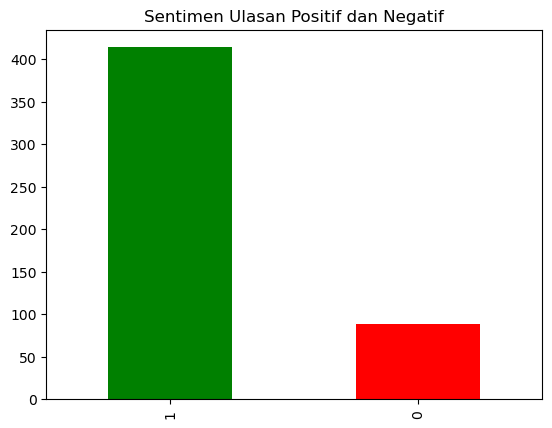

In [24]:
sentimen_data=pd.value_counts(data_label["label"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red"])
plt.title('Sentimen Ulasan Positif dan Negatif')
plt.show()

Dapat dilihat bahwa isi ulasan produk lebih banyak pada label sentimen 1 atau ulasan dengan rating postitif ini berarti pelanggan yang menggunakan marketplace Tokopedia dan melakukan transaksi pembelian pada produk masker Kesehatan merasa puas bertansaksi di marketplace Tokopedia dan prosuk masker Kesehatan sehingga memberikan feedback atau ulasan komentar lebih banyak yang positif.

In [26]:
pip install WordCloud

                                              0.0/151.4 kB ? eta -:--:--
     -------                               30.7/151.4 kB 640.0 kB/s eta 0:00:01
     ---------------                       61.4/151.4 kB 656.4 kB/s eta 0:00:01
     --------------------------           112.6/151.4 kB 819.2 kB/s eta 0:00:01
     ----------------------------------   143.4/151.4 kB 847.9 kB/s eta 0:00:01
     ------------------------------------ 151.4/151.4 kB 820.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
from wordcloud import WordCloud

## Ulasan Negatif

In [28]:
train_s0 = data_label[data_label["label"] == 0]

In [29]:
train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")

C:\Users\SF314-511\AppData\Local\Temp\ipykernel_13444\445094484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")


In [30]:
train_s0

,Nama_Produk,Akun,Ulasan_clean,label
1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Stephanus,dua kali beli sayang lambat respon order pagi ...,0
4,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Febby,panas pakai,0
5,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Rahmat,tidak ada komentar,0
16,MASKER 3PLY IZIN KEMENKES MASKER MEDIS KESEHAT...,Ridwan,karet headloop pendek istri pakai untung anak,0
17,MASKER 3PLY IZIN KEMENKES MASKER MEDIS KESEHAT...,Fatma,barang bagus hrga murah layan muas,0
...,...,...,...,...
481,FILTCARE Masker KF94 Korea 4 ply Premium isi 1...,A***n,Diprosesnya lama Tali masker sesuai iklan Tali...,0
489,Masker ALKINDO DUCKBILL 3Ply (PUTIH) 50pcs/box...,irdarmansyah,Barang datang 49 kurang 1 pcs,0
497,[ DOC ] MASKER KF94 FFP2 4PLY ISI 25 SEGEL PER...,Tuti,Tidak sesuai harapan,0
498,[ DOC ] MASKER KF94 FFP2 4PLY ISI 25 SEGEL PER...,eugenius,Penjual mengirimkan masker palsu diiklankan pe...,0


## Visualisasi Data Ulasan Negatif

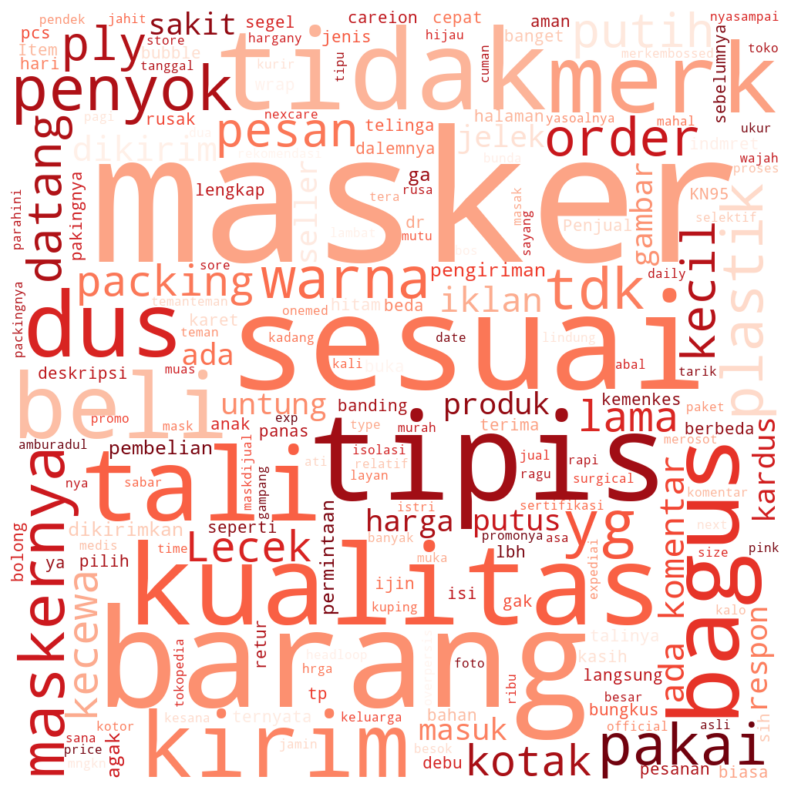

In [31]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Penjelasan
Dari visualisasi diatas merupakan wordcloud kata yang paling banyak muncul pada isi ulasan yang memiliki label sentimen negatif. Kata yang paling sering muncul dan mengarah ke ulasan negatif membahas seputar : tali, masker, kualitas, barang, harga, kotak, penyok, box, dus, tipis, putus, sobek, kualitas, karet, bolong dan sebagainya. Sehingga dari kata-kata ini bisa menjadi masukan untuk penjual dan marketplace Tokopedia untuk meningkatkan kualitas barang (produk masker kesehatan), harga, kualitas pengiriman atau pengemasan, serta kualitas produk masker Kesehatan yang paling banyak disebutkan pelanggan dalam hasil Analisa ulasan sentimen yang negatif.

## Ulasan Positif

In [32]:
train_s1 = data_label[data_label["label"] == 1]

In [33]:
train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")

C:\Users\SF314-511\AppData\Local\Temp\ipykernel_13444\4265306055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")


In [34]:
train_s1

,Nama_Produk,Akun,Ulasan_clean,label
2,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Yati,bagus kirim cepat,1
3,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Husin,barang sesuai pesan,1
6,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Alden,bagus masker,1
7,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Heni,pengiriman cepat produk bagus konsumen suka ma...,1
8,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Husin,barang sesuai pesan kirim cepat,1
...,...,...,...,...
496,[ DOC ] MASKER KF94 FFP2 4PLY ISI 25 SEGEL PER...,olivia,menyukai maskernya menyebabkan sakit telinga p...,1
500,[ DOC ] MASKER KF94 FFP2 4PLY ISI 25 SEGEL PER...,o***a,Packing dilakukan satuan aman dibawa kemana-mana,1
501,[ DOC ] MASKER KF94 FFP2 4PLY ISI 25 SEGEL PER...,Epe,Barang diproses cepat sesuai pesanan,1
502,[ DOC ] MASKER KF94 FFP2 4PLY ISI 25 SEGEL PER...,Anneke,Proses cepat barang bagus Terima kasih,1


## Visualisasi Ulasan Data Positif

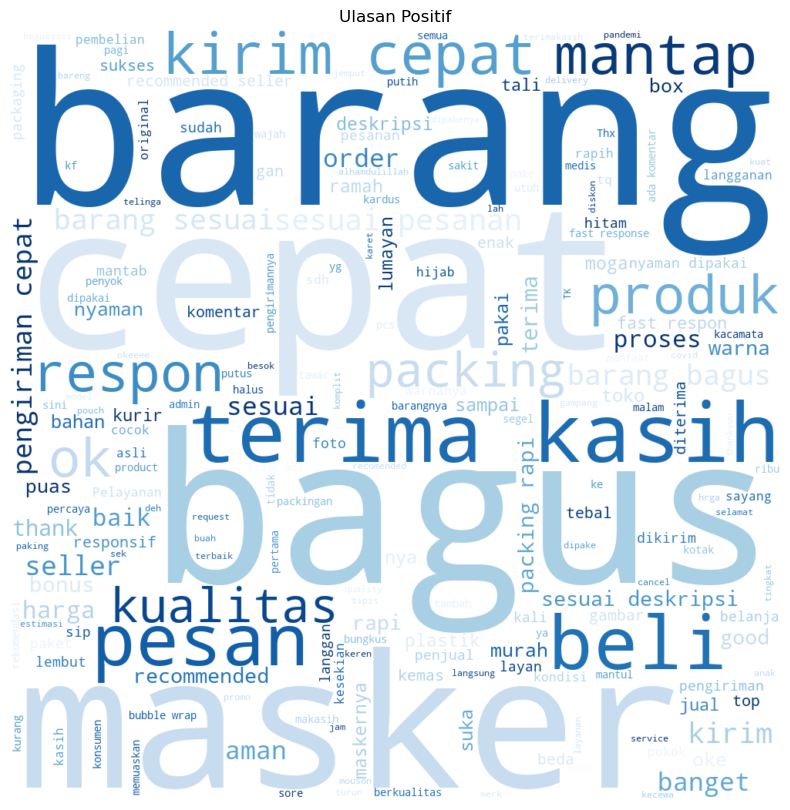

In [36]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan_clean"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

Dari visualisasi diatas merupakan wordcloud kata yang paling banyak muncul pada ulasan yang memiliki label sentimen positif. Kata yang paling sering muncul dan mengarah ke ulasan positif membahas seputar : barang, bagus,cepat, masker,terima kasih, kualitas, sesuai, rapi, respon, aman, recommended, dan sebagainya. Sehingga dari kata-kata ini bisa menjadi masukan untuk penjual dan marketplace Tokopedia untuk menjaga kualitas atau meningkatkan kembali kualitas barang (produk masker kesehatan), kualitas yang sesuai dan aman, serta respon penjual paling banyak disebutkan pelanggan dalam hasil Analisa ulasan sentimen yang positif.

## Menyiapkan Data Train dan Test
Pada proses ini menggunakan library sklearn.model_selection dengan modul train_test _split untuk membagi data latih (X_train dan y_train) dan data uji (X_test dan y_test) dengan persentasi data latih 90% dan data uji 10% serta memilih label data yaitu yang merupakan variable independen dari data yaitu kolom label untuk dijadikan parameter klasifikasi prediksi.

In [37]:
data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")

C:\Users\SF314-511\AppData\Local\Temp\ipykernel_13444\2139537248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_clean'], data_label['label'], 
                                                    test_size=0.1, stratify=data_label['label'], random_state=30)

## TF-IDF (term frequency–inverse document)
Pembobotan TF-IDF(term frequency–inverse document) untuk menghitung manual dengan menggunakan python pembobotan kata dalam dokumen data ulasan

In [40]:
import numpy as np

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [42]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(452, 766)
(51, 766)


In [43]:
X_train = X_train.toarray()

In [44]:
X_test = X_test.toarray()

## Machine Learning

In [45]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [46]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

#Fitting ke Model
gscv_nb.fit(X_train,y_train)
#mendapatkan hyperparameters terbaik
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.657933224657568}

In [47]:
nb = GaussianNB(var_smoothing=1.0)

In [48]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=1.0)

In [49]:
y_pred_nb = nb.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [51]:
from sklearn.svm import SVC  # contoh menggunakan SVM sebagai model

# Inisialisasi model
model = SVC()

# Latih model dengan data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data latih
y_pred_train = model.predict(X_train)

# Hitung matriks kebingungan
cm = confusion_matrix(y_train, y_pred_train)

# Cetak matriks kebingungan
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 70  10]
 [  0 372]]


## Classification Report

In [52]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred_nb))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred_nb))

--------------------- confusion matrix  ----------------------------
[[ 4  5]
 [ 2 40]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.89      0.95      0.92        42

    accuracy                           0.86        51
   macro avg       0.78      0.70      0.73        51
weighted avg       0.85      0.86      0.85        51



Setelah dilakukan pembagian data latih dan data uji serta pembobotan tf-idf selanjutnya dapat dilakukan proses klasifikasi prediksi menggunakan model algoritma Naïve Bayes seperti proses yang ditunjukkan pada gambar 4. Didapatkan model algoritma Naïve Bayes dapat memberikan akurasi yang cukup baik sampai 86%.

### Kesimpulan
Dari hasil penelitian menggunakan Metode Algoritma Naïve Bayes untuk mengetahui sentimen ulasan pengguna dengan klasifikasi 2 kelas positif dan negative dengan pendekatan NLP menghasilkan nilai akurasi sebesar 86%. Selain itu, didapatkan bahwa Analisa Sentimen pada ulasan marketplace Tokopedia pada produk masker kesehatan menunjukan lebih banyak pada ulasan yang positif. Ini berarti pelayanan dan produk masker Kesehatan yang disediakan di marketplace Tokopedia sudah cukup baik.

Dari hasil Analisis diatas dapat disimpulkan hasil scraping yang di dapat dari produk pencarian masker kesehatan pada Tokopedia menampilkan data yang menunjukan ulasan positif lebih dominan daripada hasil ulasan negatif dan untuk ulasan negatif kata yang paling sering muncul adalah seputar kualitas produk yang tipis,mudah putus, sobek atau bolong, kualitas karetnya dan pada pengemasan yaitu kotak/dus penyok dan untuk analisa positif kata yang paling sering muncul adalah bagus, seputar kualitas produk yang sesuai dan rapi, pengiriman yang aman dan cepat dan respon penjual.